<a href="https://colab.research.google.com/github/jaymhaiskar/cap-comp215/blob/2024.01/Project_COMP215.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

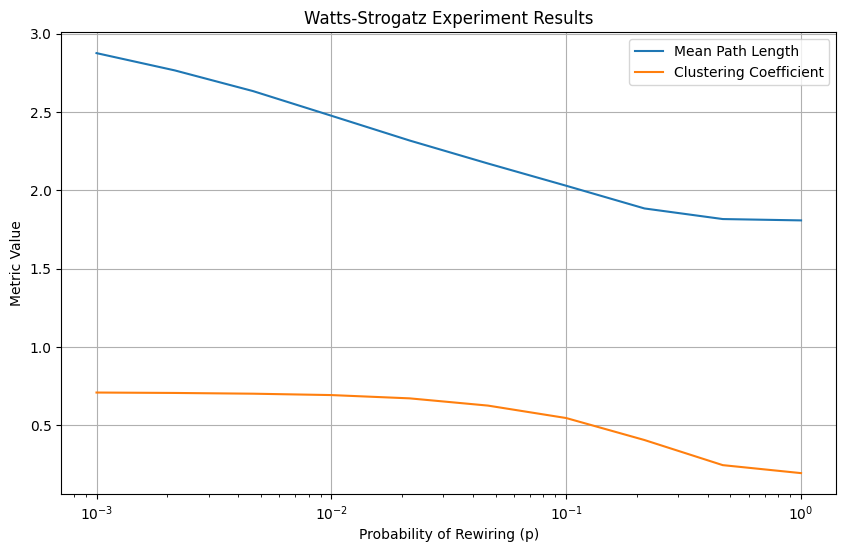

In [ ]:
'''
Jay Mhaiskar
100174787
COMP 215 Project: Watts Strogatz Experiment

Sources:
1) https://numpy.org/doc/stable/reference/generated/numpy.mean.html
2) https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html#
3) https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html
4) I asked ChatGPT to write all my comments, I have a hard time explaining what my code does in nice constructive way :)

'''


import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def watts_strogatz_experiment(n, k, p_values, num_trials):
    """
    Conducts the Watts and Strogatz experiment.

    Parameters:
        n (int): Number of nodes in the ring lattice.
        k (int): Each node is connected to k nearest neighbors in the ring topology.
        p_values (list): List of p values (probability of rewiring edges).
        num_trials (int): Number of trials for each p value.

    Returns:
        tuple: A tuple containing mean path lengths and clustering coefficients for each p value.
    """
    mean_path_lengths = []
    clustering_coefficients = []

    for p in p_values:
        path_lengths = []
        clustering_coeffs = []

        for _ in range(num_trials):
            # Create a Watts-Strogatz graph
            G = nx.watts_strogatz_graph(n, k, p)

            # Calculate mean path length
            path_lengths.append(nx.average_shortest_path_length(G))

            # Calculate clustering coefficient
            clustering_coeffs.append(nx.average_clustering(G))

        # Calculate mean of path lengths and clustering coefficients for current p value
        mean_path_length = np.mean(path_lengths)
        mean_clustering_coeff = np.mean(clustering_coeffs)

        # Append results to lists
        mean_path_lengths.append(mean_path_length)
        clustering_coefficients.append(mean_clustering_coeff)

    return mean_path_lengths, clustering_coefficients

# Experiment parameters
n = 100  # Number of nodes
k = 20    # Each node is connected to k nearest neighbors
p_values = np.logspace(-3, 0, 10)  # Probability of rewiring edges (logarithmic space)
num_trials = 100  # Number of trials for each p value

# Run experiment
mean_path_lengths, clustering_coefficients = watts_strogatz_experiment(n, k, p_values, num_trials)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(p_values, mean_path_lengths, label='Mean Path Length')
plt.plot(p_values, clustering_coefficients, label='Clustering Coefficient')
plt.xscale('log')
plt.xlabel('Probability of Rewiring (p)')
plt.ylabel('Metric Value')
plt.title('Watts-Strogatz Experiment Results')
plt.legend()
plt.grid(True)
plt.show()
